In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import hamming
import gudhi as gd
import seaborn as sns
from statistics import mode
import multiprocessing

In [5]:
!pip install lxml

Defaulting to user installation because normal site-packages is not writeable


In [2]:
pseudo_csv=pd.read_csv('ornithinimicrobiaceae.csv', sep='\t',index_col=None, header=None)
pseudo_info=pseudo_csv[0]
pseudo_info

0       666666.100008.522 -> Glycolysis|6|glyceraldehy...
1       666666.100007.1170 -> ALPHAKETOGLUTARATE_AMINO...
2       666666.100007.61 -> ALPHAKETOGLUTARATE_AMINOAC...
3       666666.100008.913 -> PYR_THR_AA|8|isopropylmal...
4       666666.100027.2135 -> ALPHAKETOGLUTARATE_AMINO...
                              ...                        
2036    666666.100030.1404 -> OXALACETATE_AMINOACIDS|1...
2037    666666.100005.2505 -> OXALACETATE_AMINOACIDS|1...
2038    666666.100042.274 -> OXALACETATE_AMINOACIDS|17...
2039    666666.100030.2840 -> PYR_THR_AA|8|isopropylma...
2040    666666.100005.1753 -> ALPHAKETOGLUTARATE_AMINO...
Name: 0, Length: 2041, dtype: object

In [3]:
for i in pseudo_info:
    if 'Citrate_synthase' in i and '100004.' in i:
        print(i)

666666.100004.255 -> TCA|1|Citrate_synthase_6|seed


In [7]:
import pandas as pd
url = r'http://132.248.196.38:8084/EvoMining/cgi-bin/heatplot.pl'
tables = pd.read_html(url) # Returns list of all tables on page
sp500_table = tables[0] # Select table of interest

ImportError: lxml not found, please install it

In [3]:
def count(info):
    tercy=[]
    for q in info:
        q_split_gen=q.split(' -> ')[1].split('|')
        pathway=q_split_gen[0]
        gen=q_split_gen[2]
        genome=q.split('.')[0]+'.'+q.split('.')[1]
        tercy.append(pathway+' '+genome+' '+gen)
    return(len(tercy),len(set(tercy)))

In [4]:
count(pseudo_info)

(2041, 2041)

In [4]:
def get_mode(df):
    arr=[]
    for i in df.values:
        for j in i:
            if j !=0:
                arr.append(j)
    return mode(arr)

In [5]:
def get_weights(presence):
    mode=get_mode(presence)
    #peso menor que moda
    piv=presence[presence<mode]
    presence[piv>0]=1
    #peso igual a moda
    presence[presence==mode]=2
    #peso mayor que moda
    presence[presence>mode]=3
    return presence

In [6]:
def get_df_by_pathways(info):
    pathways_dataframes={}
    for query in info:
        pathway=query.split(' -> ')[1].split('|')[0]
        if pathway in pathways_dataframes.keys():
            continue
        df_pathway=pd.DataFrame()
        for q in info:
            q_split_gen=q.split(' -> ')[1].split('|')
            gen=q_split_gen[2]
            genome=q.split('.')[0]+'.'+q.split('.')[1]
            
            if q_split_gen[0] != pathway:
                continue

            df_pathway.loc[genome,gen]=1
            

            #try:
             #   df_pathway.loc[genome,gen]+=1
            #except:
             #   df_pathway.loc[genome,gen]=1
            #pathways_dataframes=pathways_dataframes.copy()




        
        #Para guardar con pesos
        #pathways_dataframes[pathway]=get_weights(df_pathway.fillna(0))

        #Para guardar sin pesos
        pathways_dataframes[pathway]=df_pathway.fillna(0)
        #print('se', pathway)
    return pathways_dataframes

In [7]:
data_frames_pathways=get_df_by_pathways(pseudo_info)

In [9]:
data_frames_pathways['Glycolysis']

,Triosephosphate_isomerase_1,phosphoglycerate_kinase_1,Phosphofructokinase_7,glyceraldehyde3phosphate_dehydrogenase_3,Pyruvate_kinase_2,Glucose_kinase_6,Fructose_biphosphate_aldolase_1,phosphoglycerate_mutase_2,phosphoglycerate_mutase_1,glyceraldehyde3phosphate_dehydrogenase_4,...,Fructose_biphosphate_aldolase_2,Triosephosphate_isomerase_3,Glucose_kinase_5,Glucose_6_phosphate_isomerase_4,phosphoglycerate_mutase_4,Pyruvate_kinase_3,phosphoglycerate_mutase_3,Pyruvate_kinase_4,Phosphofructokinase_4,phosphoglycerate_kinase_2
6666666.1069531,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6666666.1069835,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6666666.1069601,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6666666.1069633,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6666666.1069655,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6666666.1069926,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6666666.1069699,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6666666.1069758,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6666666.1069667,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Let's assume that "population" is a numpy ndarray with your genomes as rows.
def calculate_hamming_matrix(population):
    # Number of genomes
    num_genomes = population.shape[0]
    # Create an empty matrix for Hamming distances
    hamming_matrix = np.zeros((num_genomes, num_genomes), dtype=int)
   # Calculate the Hamming distance between each pair of genomes
    for i in range(num_genomes):
        for j in range(i+1, num_genomes):  # j=i+1 to avoid calculating the same distance twice
            # The Hamming distance is multiplied by the number of genes to convert it into an absolute distance
            distance = hamming(population[i], population[j]) * len(population[i])
            hamming_matrix[i, j] = distance
            hamming_matrix[j, i] = distance  # The matrix is symmetric
    
    return hamming_matrix

In [12]:
def create_complex(distance_matrix2):
    # Create the Rips simplicial complex from the distance matrix
    rips_complex = gd.RipsComplex(distance_matrix=distance_matrix2)
    # Create the simplex tree from the Rips complex with a maximum dimension of 3
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    # Compute the persistence of the simplicial complex
    persistence = simplex_tree.persistence()
    # Return the persistence diagram or barcode
    return persistence, simplex_tree


In [13]:
def get_complex_by_pathways(path_dict):
    complex_path_dict={}
    for path in path_dict.keys():
        complex_path_dict[path]=create_complex(calculate_hamming_matrix(path_dict[path].values))
    return complex_path_dict

In [ ]:
def join_df_matrix_persistence:

In [19]:
def plot_all_bar_code_pathways(complex_pathways):
    for i in complex_pathways.keys():
        gd.plot_persistence_barcode(complex_pathways[i][0],legend=True)
        plt.title(f"{i}" )

<h3> Se calculan los complejos simpliciales</h3>

In [14]:
complex_pathways=get_complex_by_pathways(data_frames_pathways)

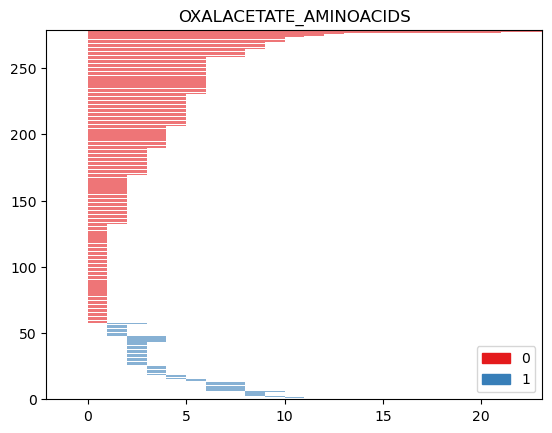

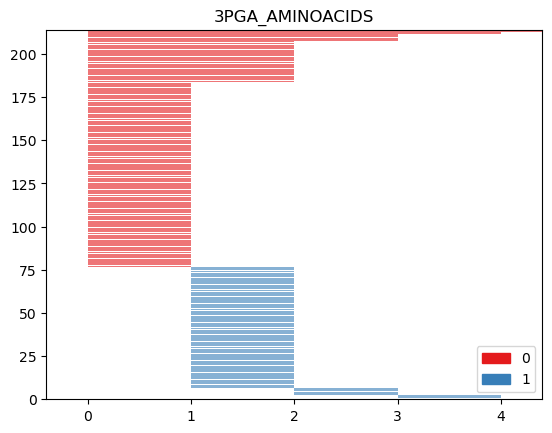

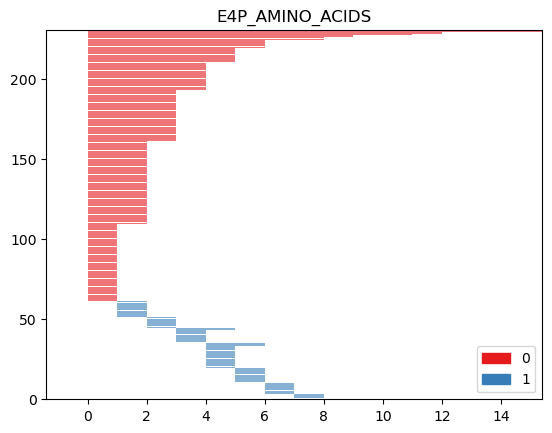

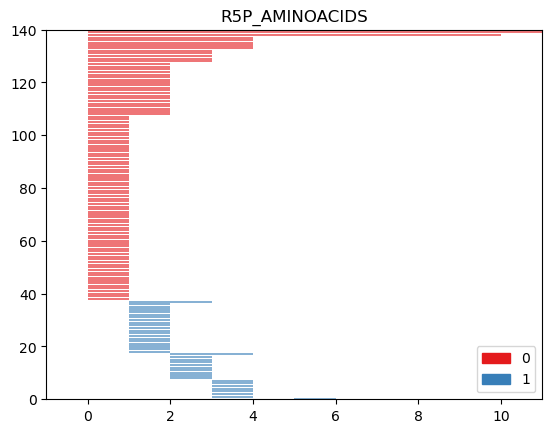

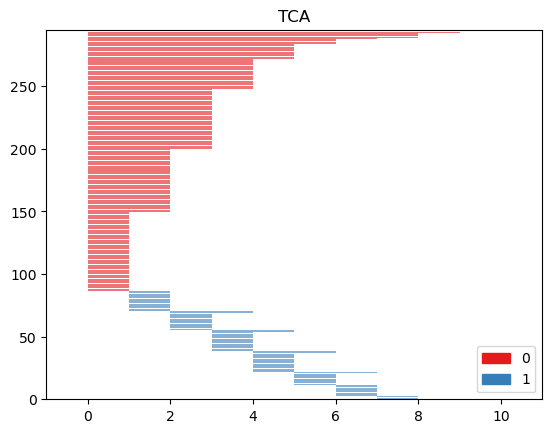

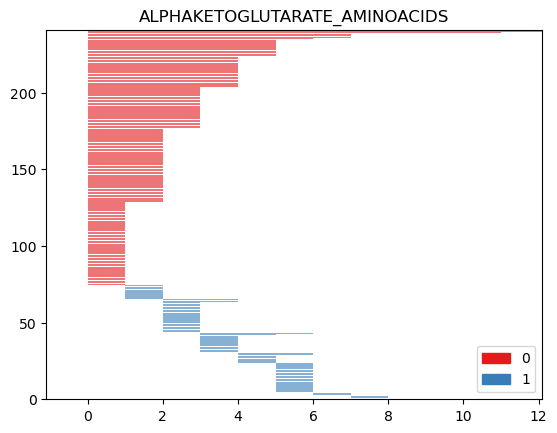

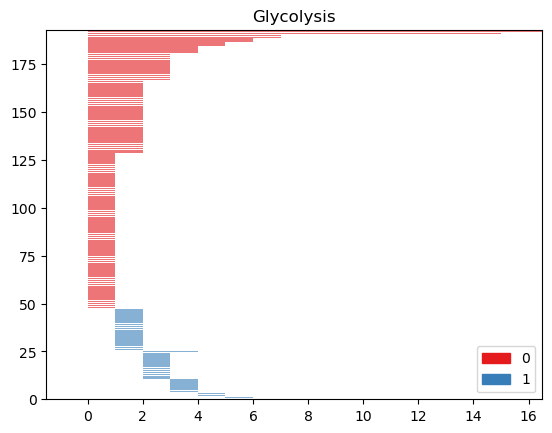

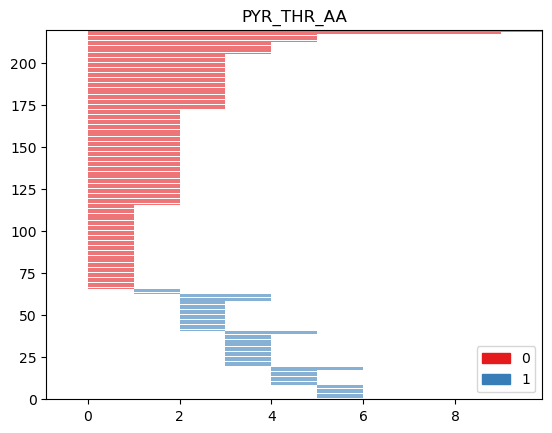

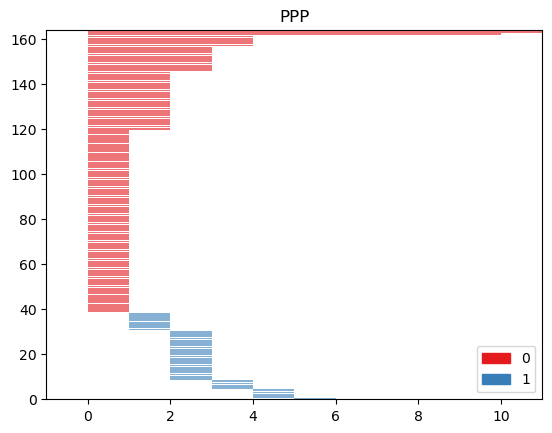

In [20]:
plot_all_bar_code_pathways(complex_pathways)

In [140]:
#complex_pathways

In [17]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import gudhi as gd
from scipy.spatial.distance import hamming
import plotly.graph_objs as go
import networkx as nx
import plotly.graph_objects as go
import plotly.io as pio

In [131]:
from networkx.utils import not_implemented_for, pairwise
from concurrent.futures import ThreadPoolExecutor, as_completed
def minimum_cycle_basis(G, weight=None, total=None):
    """Returns a minimum weight cycle basis for G

    Minimum weight means a cycle basis for which the total weight
    (length for unweighted graphs) of all the cycles is minimum.

    Parameters
    ----------
    G : NetworkX Graph
    weight: string
        name of the edge attribute to use for edge weights

    Returns
    -------
    A list of cycle lists.  Each cycle list is a list of nodes
    which forms a cycle (loop) in G. Note that the nodes are not
    necessarily returned in a order by which they appear in the cycle

    Examples
    --------
    >>> G = nx.Graph()
    >>> nx.add_cycle(G, [0, 1, 2, 3])
    >>> nx.add_cycle(G, [0, 3, 4, 5])
    >>> nx.minimum_cycle_basis(G)
    [[5, 4, 3, 0], [3, 2, 1, 0]]

    References:
        [1] Kavitha, Telikepalli, et al. "An O(m^2n) Algorithm for
        Minimum Cycle Basis of Graphs."
        http://link.springer.com/article/10.1007/s00453-007-9064-z
        [2] de Pina, J. 1995. Applications of shortest path methods.
        Ph.D. thesis, University of Amsterdam, Netherlands

    See Also
    --------
    simple_cycles, cycle_basis
    """
    # We first split the graph in connected subgraphs
    return sum(
        (_min_cycle_basis(G.subgraph(c), weight,total) for c in nx.connected_components(G)),
        [],
    )

def _min_cycle_basis(G, weight,total):
    cb = []
    cont=0
    # We  extract the edges not in a spanning tree. We do not really need a
    # *minimum* spanning tree. That is why we call the next function with
    # weight=None. Depending on implementation, it may be faster as well
    tree_edges = list(nx.minimum_spanning_edges(G, weight=None, data=False))
    chords = G.edges - tree_edges - {(v, u) for u, v in tree_edges}

    # We maintain a set of vectors orthogonal to sofar found cycles
    set_orth = [{edge} for edge in chords]
    while set_orth:
        if cont==total:
            break
        base = set_orth.pop()
        # kth cycle is "parallel" to kth vector in set_orth
        cycle_edges = _min_cycle(G, base, weight)
        cycle_found=[v for u, v in cycle_edges]

        if len(cycle_found)>3:
            cb.append(cycle_found)
            cont+=1

        # now update set_orth so that k+1,k+2... th elements are
        # orthogonal to the newly found cycle, as per [p. 336, 1]
        set_orth = [
            (
                {e for e in orth if e not in base if e[::-1] not in base}
                | {e for e in base if e not in orth if e[::-1] not in orth}
            )
            if sum((e in orth or e[::-1] in orth) for e in cycle_edges) % 2
            else orth
            for orth in set_orth
        ]
    return cb


def _min_cycle(G, orth, weight):
    """
    Computes the minimum weight cycle in G,
    orthogonal to the vector orth as per [p. 338, 1]
    Use (u, 1) to indicate the lifted copy of u (denoted u' in paper).
    """
    Gi = nx.Graph()

    # Add 2 copies of each edge in G to Gi.
    # If edge is in orth, add cross edge; otherwise in-plane edge
    for u, v, wt in G.edges(data=weight, default=1):
        if (u, v) in orth or (v, u) in orth:
            Gi.add_edges_from([(u, (v, 1)), ((u, 1), v)], Gi_weight=wt)
        else:
            Gi.add_edges_from([(u, v), ((u, 1), (v, 1))], Gi_weight=wt)

    # find the shortest length in Gi between n and (n, 1) for each n
    # Note: Use "Gi_weight" for name of weight attribute
    spl = nx.shortest_path_length
    lift = {n: spl(Gi, source=n, target=(n, 1), weight="Gi_weight") for n in G}

    # Now compute that short path in Gi, which translates to a cycle in G
    start = min(lift, key=lift.get)
    end = (start, 1)
    min_path_i = nx.shortest_path(Gi, source=start, target=end, weight="Gi_weight")

    # Now we obtain the actual path, re-map nodes in Gi to those in G
    min_path = [n if n in G else n[0] for n in min_path_i]

    # Now remove the edges that occur two times
    # two passes: flag which edges get kept, then build it
    edgelist = list(pairwise(min_path))
    edgeset = set()
    for e in edgelist:
        if e in edgeset:
            edgeset.remove(e)
        elif e[::-1] in edgeset:
            edgeset.remove(e[::-1])
        else:
            edgeset.add(e)

    min_edgelist = []
    for e in edgelist:
        if e in edgeset:
            min_edgelist.append(e)
            edgeset.remove(e)
        elif e[::-1] in edgeset:
            min_edgelist.append(e[::-1])
            edgeset.remove(e[::-1])

    return min_edgelist

In [211]:
def find_all_cycles(complex_path):
    persistence,simplex_tree=complex_pathways[complex_path]
    born_and_number = born_filtraton_value_holes(persistence)
    G=nx.Graph()
    born=born_and_number.keys()
    ciclos_dep=set()
    filtration=0
    for simplex, filt in simplex_tree.get_filtration():
        #if len(ciclos_dep)==num_holes:
         #   break
        
        if filtration!=filt and filtration in born:
            number=born_and_number[filtration]
            print('se buscan ciclos en el tiempo', filt,'para',complex_path)
            ciclos=minimum_cycle_basis(G,total=number)
            for ciclo in ciclos:
                if len(ciclo)>3:
                    print('Se encontró el ciclo',ciclo,'en el tiempo', filtration,'para',complex_path)
                    ciclos_dep.add(tuple(ciclo))
                    #Se llena el hoyo
                    for i in ciclo:
                        for j in ciclo:
                            G.add_edge(i,j)
                            
            
        filtration=filt
        
        if len(simplex)==2:
            G.add_edge(simplex[0], simplex[1])


    direc='pseudomonas_'+complex_path+'.txt'
    f = open(direc, "a")
    f.write(str(ciclos_dep))
    f.close()
        

    return ciclos_dep

In [133]:
def born_filtraton_value_holes(persistence):
    born=[]
    for bar in persistence:
        if bar[0]==1:
            born.append(bar[1][0])
            
    born_and_number=set([(x,born.count(x)) for x  in born])

    return dict(born_and_number)

In [160]:
def get_holes_by_pathways(complex_by_path):
    holes_by_path={}
    for path in complex_by_path.keys():
        holes_by_path[path]=find_all_cycles(complex_by_path[path])
    return holes_by_path

In [207]:
def get_holes_by_pathways(complex_by_path):
    llaves=complex_by_path.keys()
    with multiprocessing.Pool() as pool:
        # Mapear los ítems a la función process_item en paralelo
        results = pool.map(find_all_cycles,llaves)
    return results

In [ ]:
get_complex_by_pathways

In [ ]:
def get_index_by_vertex():
    

    return 

In [181]:
complex_pathways.keys()

dict_keys(['calcium-dependent-antibiotic', 'polyketide', 'OXALACETATE_AMINOACIDS', '3PGA_AMINOACIDS', 'ALPHAKETOGLUTARATE_AMINOACIDS', 'E4P_AMINO_ACIDS', 'Glycolysis', 'PYR_THR_AA', 'TCA', 'R5P_AMINOACIDS'])

<h3>Con las siguientes funciones se depuran los datos y se elabora el data frame de presencia </h3>

In [57]:
def get_presence(info):
    genomes=set()
    functions=set()
    for genom in info:
        split_col1_1=genom.split('-> ')[1]
        split_col1_2=split_col1_1.split('|')
        #split_col2=func.split('|')
        genomes.add(split_col1_2[0])
        functions.add(split_col1_2[2])
    presence=pd.DataFrame(index=list(genomes),columns=list(functions))
    presence=presence.fillna(0)
    presence=full_presence(info,presence)
    return presence

In [58]:
def full_presence(info,presence):
    for genom in info:
        split_col1_1=genom.split('-> ')[1]
        split_col1_2=split_col1_1.split('|')
        #split_col2=func.split('|')
        
        presence.loc[split_col1_2[0],split_col1_2[2]]+=1
        
    return presence

In [59]:
pseudo_presence=get_presence(pseudo_info)
pseudo_presence.sort_index(inplace=True)

In [60]:
pseudo_presence

,Glutamate_5_semialdehyde_dehydrogenase_2,Glutamine_synthetase_9,diaminopimelate_decarboxylase_4,Pyruvate_kinase_3,Anthranilate_synthase_component_1_1,Anthranilate_synthase_component_1_4,phosphoribosylanthranilate_isomerase_1,Acetylglutamate_kinase_3,Acetylglutamate_kinase_4,glutamate_synthase_3,...,Argininosuccinate_synthase_4,diaminopimelate_decarboxylase_3,phosphoribosyl_isomerase_A_1,Glutamine_synthetase_3,Cysteine_synthase_4,Tryptophan_synthase_alpha_4,3_dehydroquinate_synthase_1,Acetylornithine_aminotransferase_1,Aspartate_transaminase_1,3_dehydroquinate_synthase_4
3PGA_AMINOACIDS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
ALPHAKETOGLUTARATE_AMINOACIDS,60,32,0,0,0,0,0,70,15,12,...,94,0,0,11,0,0,0,99,0,0
E4P_AMINO_ACIDS,0,0,0,0,50,30,15,0,0,0,...,0,0,0,0,0,43,112,0,0,27
Glycolysis,0,0,0,23,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OXALACETATE_AMINOACIDS,0,0,14,0,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,152,0
PYR_THR_AA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R5P_AMINOACIDS,0,0,0,0,0,0,0,0,0,0,...,0,0,36,0,0,0,0,0,0,0
TCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
calcium-dependent-antibiotic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
polyketide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
get_weights(pseudo_presence)

43

In [77]:
a=pseudo_presence.loc['TCA']
a[a!=0]

Citrate_synthase_1                         3
Citrate_synthase_2                         3
fumarate_hydratase_8                       1
fumarate_reductase_ironsulfur_subunit_4    3
fumarate_reductase_ironsulfur_subunit_1    1
Citrate_synthase_3                         3
fumarate_hydratase_1                       1
fumarate_hydratase_5                       1
fumarate_hydratase_9                       3
fumarate_reductase_ironsulfur_subunit_2    1
Citrate_synthase_4                         3
fumarate_hydratase_4                       3
fumarate_hydratase_2                       3
fumarate_hydratase_7                       3
fumarate_hydratase_6                       1
fumarate_hydratase_3                       3
fumarate_reductase_ironsulfur_subunit_3    3
Name: TCA, dtype: int64

In [101]:
genes_de_ruta_met={}
for i in pseudo_presence.index:
    a=pseudo_presence.loc[i]
    b=list(a[a!=0].index)
    genes_de_ruta_met[i]=b
    print(i,'tiene',b, 'longitud' , len(b))

3PGA_AMINOACIDS tiene ['glycine_hydroxymethyltransferase_2', 'Cysteine_synthase_7', 'Cysteine_synthase_2', 'glycine_hydroxymethyltransferase_5', 'glycine_hydroxymethyltransferase_4', 'glycine_hydroxymethyltransferase_1', 'Cysteine_synthase_3', 'Cysteine_synthase_1', 'glycine_hydroxymethyltransferase_3', 'Cysteine_synthase_4', 'Cysteine_synthase_8', 'Cysteine_synthase_5', 'Cysteine_synthase_6'] longitud 13
ALPHAKETOGLUTARATE_AMINOACIDS tiene ['N_acetylglutamate_synthase_2', 'Glutamine_synthetase_10', 'glutamate_synthase_3', 'glutamate_synthase_1', 'Glutamine_synthetase_4', 'N_acetylglutamate_synthase_3', 'Ornithine_carbamoyltransferase_2', 'Argininosuccinate_synthase_3', 'Glutamine_synthetase_2', 'Glutamate_5_semialdehyde_dehydrogenase_3', 'Ornithine_carbamoyltransferase_3', 'Glutamate_5_semialdehyde_dehydrogenase_2', 'glutamate_dehydrogenase_1', 'Acetylglutamate_kinase_1', 'N_acetyl_gamma_glutamyl_phosphate_reductase_2', 'glutamate_synthase_2', 'Ornithine_carbamoyltransferase_6', 'Glut

In [65]:
data_frames_pathways[0]['R5P_AMINOACIDS']

,histidinol_dehydrogenase_2,imidazole_glycerol_phosphate_synthase_H_3,imidazole_glycerol_phosphate_synthase_H_1,histidinol_dehydrogenase_4,histidinol_dehydrogenase_3,imidazole_glycerol_phosphate_synthase_H_4,imidazole_glycerol_phosphate_synthase_H_2,phosphoribosyl_isomerase_A_3,imidazoleglycerol_phosphate_dehydratase_1,imidazoleglycerol_phosphate_dehydratase_4,...,imidazole_glycerol_phosphate_synthase_H_8,imidazole_glycerol_phosphate_synthase_H_5,imidazole_glycerol_phosphate_synthase_H_6,imidazole_glycerol_phosphate_synthase_H_7,ribosephosphate_pyrophosphokinase_1,imidazoleglycerol_phosphate_dehydratase_3,phosphoribosyl_isomerase_A_2,phosphoribosyl_isomerase_A_1,histidinol_dehydrogenase_1,phosphoribosyl_isomerase_A_4
6666666.102113,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6666666.94968,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6666666.102136,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6666666.136532,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6666666.102099,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6666666.134926,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6666666.296199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6666666.138924,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6666666.135535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [89]:
pseudo_info.values

array(['6666666.136315.1646 -> calcium-dependent-antibiotic|26|26_4|311079',
       '6666666.134953.3589 -> polyketide|215|215_1|216817',
       '6666666.136574.4344 -> OXALACETATE_AMINOACIDS|1|Aspartate_transaminase_1|216817',
       ...,
       '6666666.102121.2566 -> ALPHAKETOGLUTARATE_AMINOACIDS|8|N_acetyl_gamma_glutamyl_phosphate_reductase_2|300442',
       '6666666.139474.787 -> TCA|1|Citrate_synthase_2|216821',
       '6666666.135434.3838 -> TCA|12|fumarate_hydratase_9|300442'],
      dtype=object)

In [68]:
genomas_de_ruta_met={}
for i in pseudo_info:
    split=i.split(' -> ')
    ruta=split[1].split('|')[0]
    genomas=set()
    for j in pseudo_info:
        if ruta in j:
            split_genoma=j.split(' -> ')[0].split('.')
            genomas.add(split_genoma[0]+'.'+split_genoma[1])
    genomas_de_ruta_met[ruta]=genomas

In [69]:
len(genomas_de_ruta_met['R5P_AMINOACIDS'])

215

In [140]:
len(set(genomas_de_ruta_met['3PGA_AMINOACIDS']))

817

In [74]:
df=pd.DataFrame(index=genomas_de_ruta_met['3PGA_AMINOACIDS'],columns=genes_de_ruta_met['3PGA_AMINOACIDS'])
df

,glycine_hydroxymethyltransferase_4,glycine_hydroxymethyltransferase_5,Cysteine_synthase_5,Cysteine_synthase_1,glycine_hydroxymethyltransferase_2,Cysteine_synthase_8,Cysteine_synthase_7,Cysteine_synthase_2,Cysteine_synthase_3,glycine_hydroxymethyltransferase_3,Cysteine_synthase_6,glycine_hydroxymethyltransferase_1,Cysteine_synthase_4
6666666.135136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6666666.134940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6666666.136306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6666666.94972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6666666.136556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6666666.102140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6666666.102126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6666666.296208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6666666.139053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
len(data_frames_pathways[0]['3PGA_AMINOACIDS'].columns & df.columns)

/opt/conda/envs/TDA/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  """Entry point for launching an IPython kernel.


13

In [108]:
for i in df.index:
    for j in df.columns:
        for k in pseudo_info:
            cont=0
            if i in k and j in k and '3PGA_AMINOACIDS' in k:
                df.loc[i,j]=1

In [109]:
df.fillna(0,inplace=True)

In [110]:
df

,glycine_hydroxymethyltransferase_4,glycine_hydroxymethyltransferase_5,Cysteine_synthase_5,Cysteine_synthase_1,glycine_hydroxymethyltransferase_2,Cysteine_synthase_8,Cysteine_synthase_7,Cysteine_synthase_2,Cysteine_synthase_3,glycine_hydroxymethyltransferase_3,Cysteine_synthase_6,glycine_hydroxymethyltransferase_1,Cysteine_synthase_4
6666666.135136,0,1,1,1,0,0,0,0,0,0,0,1,0
6666666.134940,1,0,0,0,0,0,0,0,1,1,1,0,0
6666666.136306,0,0,0,0,0,0,1,0,1,1,0,0,0
6666666.94972,1,0,0,0,0,0,0,1,0,1,1,0,0
6666666.136556,0,0,0,0,1,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6666666.102140,1,0,0,0,0,0,1,0,1,1,0,0,0
6666666.102126,1,0,0,0,0,0,1,0,1,1,0,0,0
6666666.296208,0,0,0,0,0,0,0,0,1,0,1,1,0
6666666.139053,0,0,0,0,0,0,1,0,1,1,0,1,0


In [112]:
for i in df.columns:
    for j in df.index:
        if df.loc[j,i]!=data_frames_pathways[0]['3PGA_AMINOACIDS'].loc[j,i]:
            print('MAL')

In [78]:
def create_complex(distance_matrix2):
    # Create the Rips simplicial complex from the distance matrix
    rips_complex = gd.RipsComplex(distance_matrix=distance_matrix2)
    # Create the simplex tree from the Rips complex with a maximum dimension of 3
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    # Compute the persistence of the simplicial complex
    persistence = simplex_tree.persistence()
    # Return the persistence diagram or barcode
    return persistence, simplex_tree


In [79]:
matriz_pseudo=calculate_hamming_matrix(df.values)
#matriz_actino=calculate_hamming_matrix(actino_presence.values)

In [80]:
matriz_pseudo

array([[0, 8, 7, ..., 5, 6, 6],
       [8, 0, 3, ..., 3, 4, 4],
       [7, 3, 0, ..., 4, 1, 1],
       ...,
       [5, 3, 4, ..., 0, 3, 3],
       [6, 4, 1, ..., 3, 0, 0],
       [6, 4, 1, ..., 3, 0, 0]])

In [81]:
matriz_pseudo.argmax()

1

In [89]:
complex_pseudo=create_complex(matriz_pseudo)
complex_pseudo

([(1, (2.0, 4.0)),
  (1, (1.0, 3.0)),
  (1, (2.0, 3.0)),
  (1, (3.0, 4.0)),
  (1, (2.0, 3.0)),
  (1, (2.0, 3.0)),
  (1, (2.0, 3.0)),
  (1, (2.0, 3.0)),
  (1, (2.0, 3.0)),
  (0, (0.0, inf)),
  (0, (0.0, 2.0)),
  (0, (0.0, 2.0)),
  (0, (0.0, 2.0)),
  (0, (0.0, 2.0)),
  (0, (0.0, 2.0)),
  (0, (0.0, 2.0)),
  (0, (0.0, 2.0)),
  (0, (0.0, 2.0)),
  (0, (0.0, 2.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0)),
  (0, (0.0, 1.0))],
 <gudhi.simplex_tree.SimplexTree at 0x70c2066f8ed0>)

<AxesSubplot:>

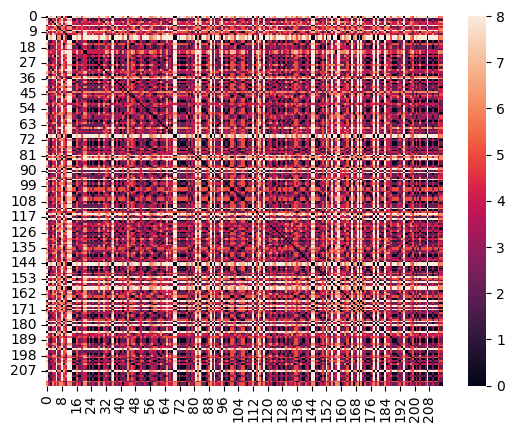

In [83]:
sns.heatmap(matriz_pseudo)

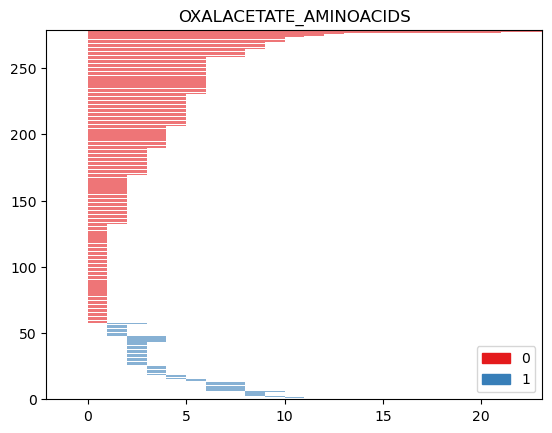

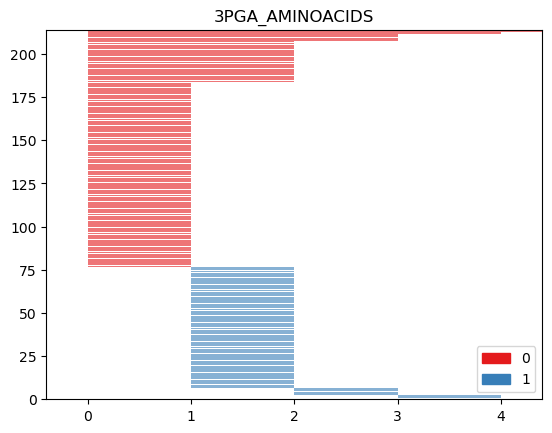

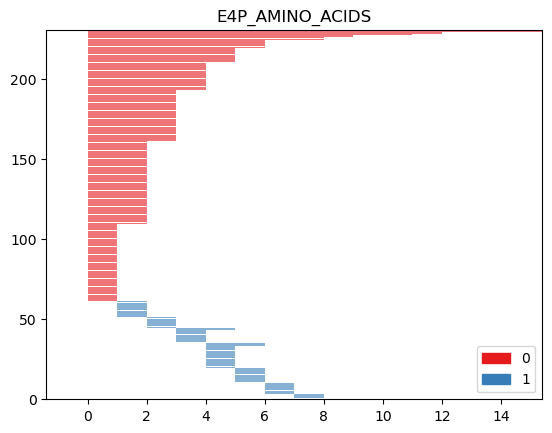

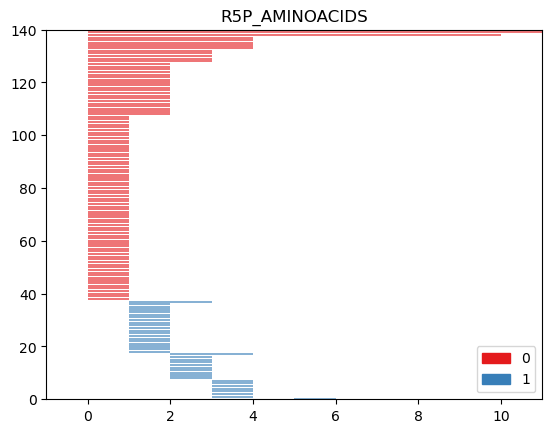

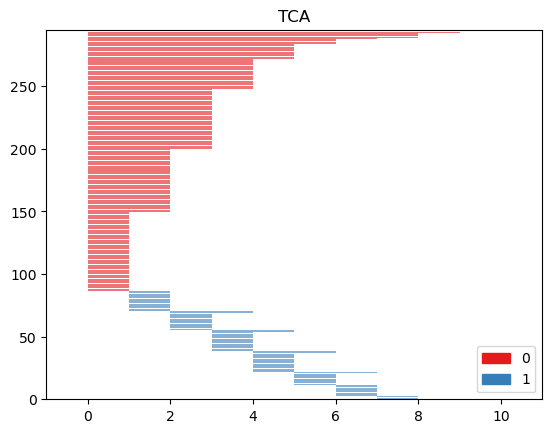

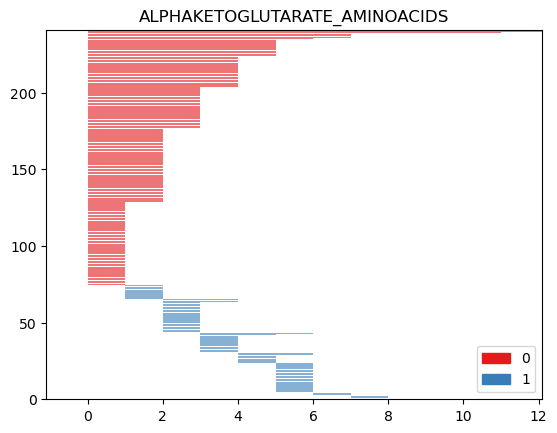

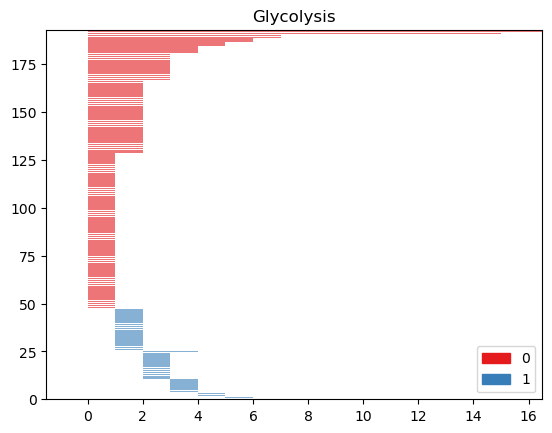

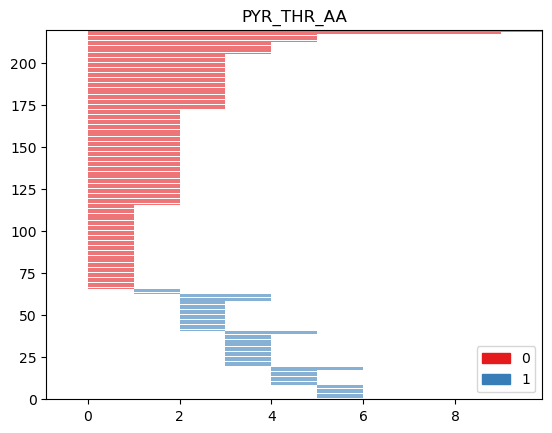

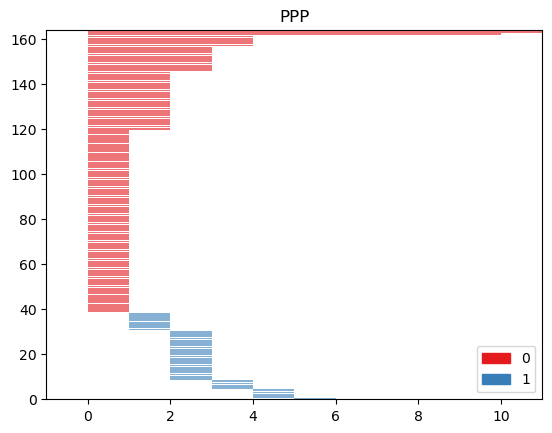

In [18]:
for i in complex_pathways.keys():
    gd.plot_persistence_barcode(complex_pathways[i][0],legend=True)
    plt.title(f"{i}" )

In [232]:
complex_pathways.keys()

dict_keys(['calcium-dependent-antibiotic', 'polyketide', 'OXALACETATE_AMINOACIDS', '3PGA_AMINOACIDS', 'ALPHAKETOGLUTARATE_AMINOACIDS', 'E4P_AMINO_ACIDS', 'Glycolysis', 'PYR_THR_AA', 'TCA', 'R5P_AMINOACIDS'])

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

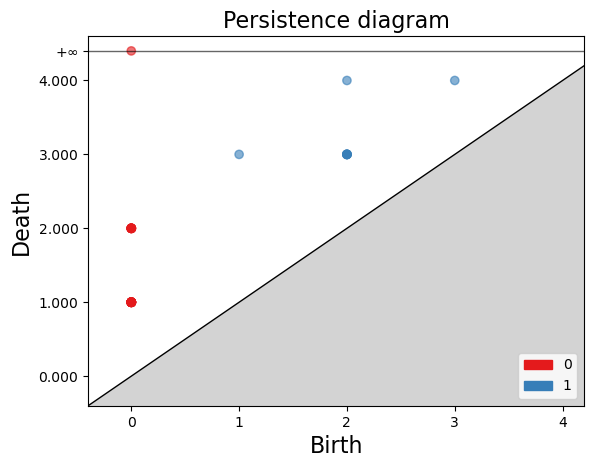

In [228]:
gd.plot_persistence_diagram(complex_pseudo[0],legend=True)

In [163]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import gudhi as gd
from scipy.spatial.distance import hamming
import plotly.graph_objs as go
import networkx as nx
import plotly.graph_objects as go
import plotly.io as pio

In [164]:
def visualize_simplicial_complex(simplex_tree, filtration_value, vertex_names=None, save_filename=None, plot_size=1, dpi=600, pos=None):
    G = nx.Graph()
    triangles = []  # List to store triangles (3-nodes simplices)
    
    for simplex, filt in simplex_tree.get_filtration():
        if filt <= filtration_value:
            if len(simplex) == 2:
                G.add_edge(simplex[0], simplex[1])
            elif len(simplex) == 1:
                G.add_node(simplex[0])
            elif len(simplex) == 3:
                triangles.append(simplex)
    
    # Calculate node positions if not provided
    if pos is None:
        pos = nx.spring_layout(G)
    
    # Node trace
    x_values, y_values = zip(*[pos[node] for node in G.nodes()])
    node_labels = [vertex_names[node] if vertex_names else str(node) for node in G.nodes()]
    node_trace = go.Scatter(x=x_values, y=y_values, mode='markers+text', hoverinfo='text', marker=dict(size=14), text=node_labels, textposition='top center', textfont=dict(size=14))
    
    # Edge traces
    edge_traces = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace = go.Scatter(x=[x0, x1, None], y=[y0, y1, None], mode='lines', line=dict(width=3, color='rgba(0,0,0,0.5)'))
        edge_traces.append(edge_trace)
    
    # Triangle traces
    triangle_traces = []
    for triangle in triangles:
        x0, y0 = pos[triangle[0]]
        x1, y1 = pos[triangle[1]]
        x2, y2 = pos[triangle[2]]
        triangle_trace = go.Scatter(x=[x0, x1, x2, x0, None], y=[y0, y1, y2, y0, None], fill='toself', mode='lines+markers', line=dict(width=2), fillcolor='rgba(255,0,0,0.2)')
        triangle_traces.append(triangle_trace)
    
    # Configure the layout of the plot
    layout = go.Layout(showlegend=False, hovermode='closest', xaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')), yaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')))
    
    fig = go.Figure(data=edge_traces + triangle_traces + [node_trace], layout=layout)
    
    # Set the figure size
    fig.update_layout(width=plot_size * dpi, height=plot_size * dpi)
    
    # Save the figure if a filename is provided
    if save_filename:
        pio.write_image(fig, save_filename, width=plot_size * dpi, height=plot_size * dpi, scale=1)
    
    # Show the figure
    #fig.show()

    
    

    return G

In [165]:
from networkx.utils import not_implemented_for, pairwise
from concurrent.futures import ThreadPoolExecutor, as_completed
def minimum_cycle_basis(G, weight=None, total=None):
    """Returns a minimum weight cycle basis for G

    Minimum weight means a cycle basis for which the total weight
    (length for unweighted graphs) of all the cycles is minimum.

    Parameters
    ----------
    G : NetworkX Graph
    weight: string
        name of the edge attribute to use for edge weights

    Returns
    -------
    A list of cycle lists.  Each cycle list is a list of nodes
    which forms a cycle (loop) in G. Note that the nodes are not
    necessarily returned in a order by which they appear in the cycle

    Examples
    --------
    >>> G = nx.Graph()
    >>> nx.add_cycle(G, [0, 1, 2, 3])
    >>> nx.add_cycle(G, [0, 3, 4, 5])
    >>> nx.minimum_cycle_basis(G)
    [[5, 4, 3, 0], [3, 2, 1, 0]]

    References:
        [1] Kavitha, Telikepalli, et al. "An O(m^2n) Algorithm for
        Minimum Cycle Basis of Graphs."
        http://link.springer.com/article/10.1007/s00453-007-9064-z
        [2] de Pina, J. 1995. Applications of shortest path methods.
        Ph.D. thesis, University of Amsterdam, Netherlands

    See Also
    --------
    simple_cycles, cycle_basis
    """
    # We first split the graph in connected subgraphs
    return sum(
        (_min_cycle_basis(G.subgraph(c), weight,total) for c in nx.connected_components(G)),
        [],
    )

def _min_cycle_basis(G, weight,total):
    cb = []
    cont=0
    # We  extract the edges not in a spanning tree. We do not really need a
    # *minimum* spanning tree. That is why we call the next function with
    # weight=None. Depending on implementation, it may be faster as well
    tree_edges = list(nx.minimum_spanning_edges(G, weight=None, data=False))
    chords = G.edges - tree_edges - {(v, u) for u, v in tree_edges}

    # We maintain a set of vectors orthogonal to sofar found cycles
    set_orth = [{edge} for edge in chords]
    while set_orth:
        if cont==total:
            break
        base = set_orth.pop()
        # kth cycle is "parallel" to kth vector in set_orth
        cycle_edges = _min_cycle(G, base, weight)
        cycle_found=[v for u, v in cycle_edges]

        if len(cycle_found)>3:
            cb.append(cycle_found)
            cont+=1

        # now update set_orth so that k+1,k+2... th elements are
        # orthogonal to the newly found cycle, as per [p. 336, 1]
        set_orth = [
            (
                {e for e in orth if e not in base if e[::-1] not in base}
                | {e for e in base if e not in orth if e[::-1] not in orth}
            )
            if sum((e in orth or e[::-1] in orth) for e in cycle_edges) % 2
            else orth
            for orth in set_orth
        ]
    return cb


def _min_cycle(G, orth, weight):
    """
    Computes the minimum weight cycle in G,
    orthogonal to the vector orth as per [p. 338, 1]
    Use (u, 1) to indicate the lifted copy of u (denoted u' in paper).
    """
    Gi = nx.Graph()

    # Add 2 copies of each edge in G to Gi.
    # If edge is in orth, add cross edge; otherwise in-plane edge
    for u, v, wt in G.edges(data=weight, default=1):
        if (u, v) in orth or (v, u) in orth:
            Gi.add_edges_from([(u, (v, 1)), ((u, 1), v)], Gi_weight=wt)
        else:
            Gi.add_edges_from([(u, v), ((u, 1), (v, 1))], Gi_weight=wt)

    # find the shortest length in Gi between n and (n, 1) for each n
    # Note: Use "Gi_weight" for name of weight attribute
    spl = nx.shortest_path_length
    lift = {n: spl(Gi, source=n, target=(n, 1), weight="Gi_weight") for n in G}

    # Now compute that short path in Gi, which translates to a cycle in G
    start = min(lift, key=lift.get)
    end = (start, 1)
    min_path_i = nx.shortest_path(Gi, source=start, target=end, weight="Gi_weight")

    # Now we obtain the actual path, re-map nodes in Gi to those in G
    min_path = [n if n in G else n[0] for n in min_path_i]

    # Now remove the edges that occur two times
    # two passes: flag which edges get kept, then build it
    edgelist = list(pairwise(min_path))
    edgeset = set()
    for e in edgelist:
        if e in edgeset:
            edgeset.remove(e)
        elif e[::-1] in edgeset:
            edgeset.remove(e[::-1])
        else:
            edgeset.add(e)

    min_edgelist = []
    for e in edgelist:
        if e in edgeset:
            min_edgelist.append(e)
            edgeset.remove(e)
        elif e[::-1] in edgeset:
            min_edgelist.append(e[::-1])
            edgeset.remove(e[::-1])

    return min_edgelist

In [166]:
def find_all_cycles(simplex_tree,persistence):
    born_and_number = born_filtraton_value_holes(persistence)
    G=nx.Graph()
    born=born_and_number.keys()
    ciclos_dep=set()
    filtration=0
    for simplex, filt in simplex_tree.get_filtration():
        #if len(ciclos_dep)==num_holes:
         #   break
        
        if filtration!=filt and filtration in born:
            number=born_and_number[filtration]
            print('se buscan ciclos en el tiempo', filt)
            ciclos=minimum_cycle_basis(G,total=number)
            for ciclo in ciclos:
                if len(ciclo)>3:
                    print('Se encontró el ciclo',ciclo,'en el tiempo', filtration)
                    ciclos_dep.add(tuple(ciclo))
                    #Se llena el hoyo
                    for i in ciclo:
                        for j in ciclo:
                            G.add_edge(i,j)
                            
            
        filtration=filt
        
        if len(simplex)==2:
            G.add_edge(simplex[0], simplex[1])

        

    return ciclos_dep

In [167]:
def born_filtraton_value_holes(persistence):
    born=[]
    for bar in persistence:
        if bar[0]==1:
            born.append(bar[1][0])
            
    born_and_number=set([(x,born.count(x)) for x  in born])

    return dict(born_and_number)
    

In [168]:
cont=0
for i in complex_pseudo[0]:
    if i[0]==1:
        cont+=1
print(cont)

9


In [ ]:
pseudomonas={(166, 140, 201, 72), (39, 193, 133, 19), (76, 75, 149, 70), (53, 30, 93, 122, 51), (26, 174, 144, 177, 96, 23), (171, 170, 53, 19), (167, 165, 164, 48), (85, 90, 83, 35), (105, 22, 53, 19), (90, 192, 53, 64), (166, 150, 165, 72), (201, 70, 53, 19), (69, 35, 47, 23), (26, 208, 209, 23), (30, 33, 77, 19), (113, 17, 77, 19), (62, 201, 53, 2), (181, 100, 70, 23), (53, 22, 5, 2), (30, 192, 138, 53), (41, 104, 62, 164, 42), (70, 53, 107, 44), (91, 153, 46, 35), (64, 90, 50, 37), (94, 56, 174, 23), (47, 166, 174, 23), (85, 37, 58, 35), (53, 138, 20, 19), (153, 102, 101, 72), (76, 70, 69, 23)}

In [ ]:

for ciclo in pseudomonas:
    arr=[]
    for i in ciclo:
        arr.append(pseudo_presence.index[i])
    print('el ciclo', ciclo, 'son', arr)
    
    

In [169]:
%%time
ciclos_pseudo=find_all_cycles(complex_pseudo[1],complex_pseudo[0])

se buscan ciclos en el tiempo 2.0
Se encontró el ciclo [77, 141, 42, 52, 5, 92, 80, 33, 66, 4] en el tiempo 1.0
se buscan ciclos en el tiempo 3.0


KeyboardInterrupt: 

In [ ]:
ciclos_pseudo={(4, 20, 82, 116, 18),
 (13, 62, 75, 29),
 (17, 8, 58, 30),
 (20, 69, 17, 18),
 (28, 148, 149, 26),
 (38, 33, 25, 92, 73, 26),
 (71, 151, 149, 26),
 (82, 150, 152, 116),
 (88, 78, 24, 28),
 (88, 184, 141, 28),
 (92, 135, 149, 73),
 (92, 136, 78, 24),
 (116, 137, 97, 29),
 (116, 138, 78, 29),
 (116, 143, 76, 29),
 (116, 143, 189, 154),
 (116, 152, 109, 29),
 (123, 94, 24, 18),
 (125, 133, 88, 41),
 (132, 128, 107, 138),
 (133, 147, 161, 78, 88),
 (148, 190, 184, 28),
 (161, 78, 116, 154),
 (178, 190, 201, 167),
 (184, 166, 78, 88),
 (187, 212, 195, 167),
 (193, 166, 78, 138),
 (194, 133, 142, 190),
 (201, 212, 200, 190),
 (212, 150, 116, 187)}

In [ ]:
ciclos_pseudo

In [ ]:
f = open("demofile2.txt", "a")
f.write(str(ciclos_pseudo))
f.close()

In [ ]:
from concurrent.futures import ProcessPoolExecutor


def find_cycles_at_filtration(G, filtration, born_and_number):
    born=born_and_number.keys()
    ciclos_dep = set()
    if filtration in born:
        number=born_and_number[filtration]
        print('se buscan',number,'ciclos')
        ciclos = minimum_cycle_basis(G,total=20)
        print('Se encontraron los ciclos',ciclos)
        for ciclo in ciclos:
            ciclos_dep.add(tuple(ciclo))
                #Se llena el hoyo
            for i in ciclo:
                for j in ciclo:
                    G.add_edge(i, j)
    return ciclos_dep

def find_all_cycles(simplex_tree, persistence):
    born_and_number = born_filtraton_value_holes(persistence)
    
    G = nx.Graph()
    ciclos_dep = set()
    filtration = 0
    
    with ProcessPoolExecutor() as executor:
        futures = []
        for simplex, filt in simplex_tree.get_filtration():
            if filtration != filt:
                future = executor.submit(find_cycles_at_filtration, G.copy(), filtration, born_and_number)
                futures.append(future)
            filtration = filt
            if len(simplex) == 2:
                G.add_edge(simplex[0], simplex[1])
        
        for future in futures:
            ciclos_dep.update(future.result())

    return ciclos_dep

In [ ]:
import networkx as nx
from concurrent.futures import ProcessPoolExecutor

def find_cycle_basis(subgraph):
    return list(nx.minimum_cycle_basis(subgraph))

def get_subgraphs(graph):
    return [graph.subgraph(c) for c in nx.connected_components(graph)]

def parallel_minimum_cycle_basis(graph):
    subgraphs = get_subgraphs(graph)
    with ProcessPoolExecutor() as executor:
        results = list(executor.map(find_cycle_basis, subgraphs))
    
    # Combinar resultados
    cycle_basis = [cycle for sublist in results for cycle in sublist]
    
    return cycle_basis

In [ ]:
[12,12].count(12)

In [ ]:
from multiprocessing.pool import Pool as ProcessPool

In [ ]:
with ProcessPool(processes=8) as pool:  # context manager providing a `Pool` instance
    result = pool.map(find_all_cycles, complex_pseudo[1],complex_pseudo[0])

In [ ]:
contador=0
for i in complex_pseudo[0]:
    if i[0]==1:
        contador+=1
contador

In [ ]:
G = nx.Graph()
nx.add_cycle(G,[195, 212, 167, 187])
nx.add_cycle(G,[212, 116, 150, 187])
nx.add_cycle(G,[212, 200, 201, 190])

#nx.add_cycle(G,[33, 84, 90, 26])
#nx.add_cycle(G,[24, 88, 28, 78])
#nx.add_cycle(G,[184, 88, 28, 141])
#nx.add_cycle(G,[136, 24, 92, 78])

#nx.add_cycle(G,[17, 8, 58, 30])
#nx.add_cycle(G,[17, 20, 69, 29])
#nx.add_cycle(G,[13, 75, 29, 62])

In [ ]:
nx.draw(G, with_labels = True)

# complex_pseudo[0]

In [ ]:
def find_cycles(simplex_tree, filtration_value):
    G=nx.Graph()
    for simplex, filt in simplex_tree.get_filtration():
        if filt <= filtration_value:
            if len(simplex) == 2:
                G.add_edge(simplex[0], simplex[1])
    

    #ciclos=nx.cycle_basis(G)
    ciclos=nx.minimum_cycle_basis(G)
    ciclos_dep=set()
    for ciclo in ciclos:
        if len(ciclo)>3:
            print('Se encontró el ciclo',ciclo,'en el tiempo', filtration_value)
            ciclos_dep.add(tuple(ciclo))

    return G

In [ ]:
1+1

<h2>Generar transferencia horizontal </h2>

In [ ]:
def mutate(genome, prob, mutated_positions):
    """Performs mutations on a genome with a certain probability."""
    mutations = []
    for i in range(len(genome)):
        if not mutated_positions[i] and np.random.rand() < prob:
            genome[i] = 1 if genome[i] == 0 else 0
            mutations.append(i)
            mutated_positions[i] = True
    return genome, mutations

def create_generation(population, num_offspring, prob, mutated_positions):
    """Creates a new generation from the existing population."""
    new_population = []
    new_generation_history = []
    for idx, genome in enumerate(population):
        for _ in range(num_offspring):
            new_genome, mutations = mutate(genome.copy(), prob, mutated_positions)
            new_population.append(new_genome)
            new_generation_history.append({'parent': idx, 'mutations': mutations})
    return new_population, new_generation_history

def create_population(num_genes, mutation_probability, num_generations, num_offspring, percentage_ones,semilla):
    np.random.seed(semilla)

    initial_genome = np.random.choice([0, 1], size=num_genes, p=[1-percentage_ones, percentage_ones])
    population = [initial_genome]
    genome_history = []
    global_mutated_positions = np.zeros(num_genes, dtype=bool)

    for generation in range(num_generations):
        population, generation_history = create_generation(population, num_offspring, mutation_probability, global_mutated_positions)
        genome_history.extend(generation_history)
        print(f"Generation {generation+1}: {len(population)} genomes")
        # Uncomment the next line if you want to see the details of each generation
        # print(len(population), generation_history)

    return population, genome_history

In [ ]:
# Example usage
num_genes = 505
mutation_probability = 1 / num_genes
num_generations = 7
num_offspring = 2
percentage_ones = 0.25

population, population_genome_history = create_population(num_genes, mutation_probability, num_generations, num_offspring, percentage_ones,42)
population = np.array(population)

In [ ]:
def modify_genomes(population, num_groups, group_size, num_positions_to_change):
    np.random.seed(42)  # Puedes usar cualquier número como semilla

    # Crear una copia de la población para evitar modificar el original
    modified_population = population.copy()

    for _ in range(num_groups):
        # Seleccionar genomas de manera aleatoria
        genome_indices = np.random.choice(population.shape[0], group_size, replace=False)
        
        # Elegir un punto de inicio al azar y seleccionar posiciones contiguas para cambiar
        start_position = np.random.choice(population.shape[1] - num_positions_to_change)
        positions_to_change = np.arange(start_position, start_position + num_positions_to_change)
        
        for index in genome_indices:
            # Cambiar los valores en las posiciones seleccionadas a 1
            modified_population[index, positions_to_change] = 1
    
    return modified_population

In [ ]:
population_2=modify_genomes(population, num_groups=2, group_size=3, num_positions_to_change=population.shape[1]//32)

In [ ]:
hamming_matrix_2 = calculate_hamming_matrix(population_2)
#hamming_matrix_2

# Print the normalized Hamming distance matrix
#print("Normalized Hamming Distance Matrix:")
#print(normalized_hamming_matrix_2)
persistence2, simplex_tree2 = create_complex(hamming_matrix_2)
gd.plot_persistence_barcode(persistence2)
gd.plot_persistence_diagram(persistence2)